# **Predict Suicidal Tendency Prediction from Social Media Text using NLP**

# Description

**Data Preprocessing**

*   Lemmatization

**Feature Extraction:**

*   Bag of words


**Machine Learning Models:**

*   Multinomial Naive Bayes
*   Gradient Boosting
*   Adaptive Gradient Boosting
*   K Nearest Neighbor
*   Random Forest





# Importing components

In [ ]:
#@title Downloading dataset file
!gdown --id 1AyDDIFN0KpWQoqAm7LEBnyFKPtrM78mp

Downloading...
From: https://drive.google.com/uc?id=1AyDDIFN0KpWQoqAm7LEBnyFKPtrM78mp
To: /content/Suicide_Detection001.csv
100% 36.1M/36.1M [00:00<00:00, 160MB/s] 


In [ ]:
#@title Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import spacy 
nltk.download('stopwords')
nltk.download("book")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    | 

# Dataset Description

In [ ]:
pd.set_option("display.max_colwidth", -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [ ]:
#@title Dataset Head
dataset = pd.read_csv('Suicide_Detection001.csv')
dataset = dataset.drop(dataset.columns[0], axis=1)
dataset.shape
dataset

,text,class
0,"I'm currently recovering from a major depressive episode and have been prescribed 75mg zoloft everyday. I've been on it for a few months now, taking it very consistently and it has definitely helped my mood. I think I missed a dose 2 days ago and today I feel the worst mentally that I have in a while. I had a pretty strong headache this morning and have been really negative and thinking about suicide a lot. Is this normal when you miss a dose or is it something else entirely? I don't know what else could have triggered this.",non-suicide
1,"I have a well paid job, girlfriend, friends, loving family yet I'm still so unhappy. What do I do?\n\n6 months ago i never had any of this, I was living with relatives, with nothing but my bed to sleep in. Everyday I'd wake up and do nothing, I'd be so depressed. But now everything has changed, so much has changed so I quickly that it's hard for me to cope with it even if it's a great.\n\nYet I'm so depressed. More than before. Atleast before I had nothing to lose whereas now I have more to lose and so much more depression to go along with it.\n\nI've turned to alcohol more now than ever in a way to cope. It's affecting the people I love yet I feel so empty, bored and longing for somthing out of reach. I don't know how to describe my feelings anymore.\n\nIn a weird selfish way I felt more at peace when I had nothing at all. I'm afraid I've gotten too old to cope with life at this point and I don't know what to do.",non-suicide
2,"I feel so desperate to feel happy again, or at least to not feel what I feel. I'm as desperate as if I were drowning and trying to swim back to shore, it feels like the same kind of desperation. Jesus fucking Christ what I'd give to just be happy, I can't take any of this shit.",non-suicide
3,The boyfriend I'm dating for 4 years are leaving and I'm afraid that the only support system I have are gone.\n\nI has been depressed and suicidal for awhile now and I am trying my very best not to tell him how anxious I am feeling knowing that he is going to work in another country soon. I do not want my depression to affect his choice of wether to take the job or not.\n\nI'm really scare that I will be all alone when the depression and suicidal thoughts strikes.,suicide
4,"I had ask my boyfriend to stop continuing a joke a found to be rather bothersome 4 times before he actually stopped, then I mentioned that I shouldn’t have to ask him 4 times and he turned it around on me and said I should be able to take a joke.\n\nFast forward about 30 minutes, he asks for attention and I asked if I could have an apology. He didn’t understand what I wanted an apology for, he forgot what had happened earlier so I told him I didn’t appreciate him trying to turn something around on me and that if either of asks the other person to stop we should just stop. He said sorry, I asked him if he meant it and he said I don’t know. \n\nFast forward another 30 minutes and he asks me again what he did then gives me an apology. He then continues and says I’ve never had a relationship with so many unhappy moments, which makes me feel terrible. \n\nFirst, it makes me feel like he continually compares our relationship to his past relationships. Second, we made mistakes early on in our relationship, like moving in together too soon, which has had lasting effects on our relationship. We’re now at a point where we would naturally live together and the effects from us living together too soon aren’t that drastic, but it does mean our relationship isn’t even remotely comparable to his past relationships as those were almost all long distance for the majority of the relationship. \n\nFinally, I’ve brought up the idea of us going to therapy to get help working through some of our issues and he is so opposed to it. I’m trying to fix the issues we have but I feel like I am the only one trying, then I feel like shit because he says he’s never had so many unhappy moments in a relationship when he is u

In [ ]:
dataset.sample(6)

,text,class
7975,"I am so good at acting normal but I just want to end it. Love is not something I will ever, nor something I deserve",suicide
15599,"For once, after a long time, I was doing so well. I didn’t get angry much. I didn’t get intrusive thoughts. My mind didn’t turn to suicidal thoughts at every little inconvenience. I woke up at 3 am everyday to go for a run.\n\nNow I’m back to square one. I still do everything the same way. I have no idea where I went wrong.",non-suicide
43401,I think im going to quit my job and just drive around in my car for awhile. I feel like im avoiding life or being an adult or something and it all just sort of snowballs into wanting to kill myself. Idk i think quitting and driving around is a good idea just to like get out of town versus get out of life,suicide
34319,"I used to love performing my music for people. I used to love putting on shows and engaging audiences.\n\nBut something changed. I don’t know when or why, but now performing brings the harshest waves of depression and anxiety. \n\nI’ve never cried so hard after finishing a performance as I did tonight.\n\nNumb. I’m just so numb.",non-suicide
24160,So im a 17 year old male and recently been diagnosed with severe depression/anxiety/stress and was put on zoloft about 4 days ago. In not sure if its correlated but since starting my anxiety has shot through the roof and i ended up drinking alcohol last night and had a panic attack and hurt myself. Its also increased my suicidal thoughts quite significantly. Is this a common experience with people who take zoloft?,non-suicide
13262,21F everything is so lonely nowadays. I just want to talk. where can i find people to talk to,non-suicide


In [ ]:
#@title Dataset Description
dataset.describe(include='all')

,text,class
count,43758,43758
unique,43758,2
top,"I'm currently recovering from a major depressive episode and have been prescribed 75mg zoloft everyday. I've been on it for a few months now, taking it very consistently and it has definitely helped my mood. I think I missed a dose 2 days ago and today I feel the worst mentally that I have in a while. I had a pretty strong headache this morning and have been really negative and thinking about suicide a lot. Is this normal when you miss a dose or is it something else entirely? I don't know what else could have triggered this.",non-suicide
freq,1,21879


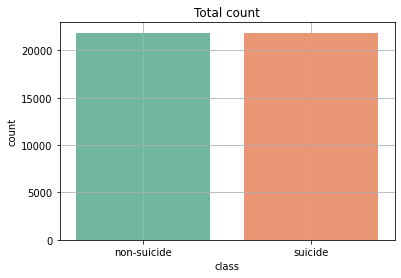

In [ ]:
#@title Dataset Outcome Graph
sns.countplot(x='class',data=dataset, palette='Set2')
plt.title('Total count')
plt.grid()

In [ ]:
print(dataset.groupby(['class'])['class'].count())

class
non-suicide    21879
suicide        21879
Name: class, dtype: int64


In [ ]:
a = 21879 * 0.8
b = 21879 * 0.2
print("training set size: ", a)
print("testing set size: ", b)

training set size:  17503.2
testing set size:  4375.8


# Model zz1
*  **Preprocessing:** Lemmatization
*  **Feature Extraction:** Bag of words

*  **ML Algorithms:** Naive Bayes, Gradient Boosting, K Nearest Neighbor, Random Forest

## Data preprocessing & feature extraction

In [ ]:
# title Lemmatization
nlp = spacy.load("en", disable=['parser', 'tagger', 'ner'])
nlp.Defaults.stop_words -= {"no", "not", "n't", "nothing", "without", "nobody"}
stops = stopwords.words("english")

def normalize(text, lowercase, remove_stopwords):
    if lowercase:
        text = text.lower()
    text = re.sub('W*dw*',' ', text)            #remove words and digits like game57
    text = re.sub('https:\/\/.*',' ', text)     #remove url       
    text = re.sub('[^a-zA-Z]', ' ', text)       #remove non alphabetic character
    text = re.sub(' +', ' ', text)              #remove extra space 
    text = nlp(text)
    lemmatized = list()
    for word in text:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)


dataset['text'] = dataset['text'].replace('\n',' ', regex=True)         #removing new lines
dataset['text'] = dataset['text'].apply(normalize, lowercase=True, remove_stopwords=True)


In [ ]:
dataset.sample(10)

,text,class
11105,sit front computer think back long ago front screen write final goo bye although please far come know eep much far go sai mitting okay okay even though know much alone feel har time feel lose scare leave question existence purpose one ay hope able say thing lou aroun even hello ing behin computer write thing challenge however even feel relief within experience rare feel happiness pri e within oing chance rea ing try lou hea feel overwhelm sensation sa ness anxiety worthlessness feel right mit okay think shoul make clear front writer claim sure old school english teacher woul fin hilarious attempt write also nee say traine way vise support people suffer mental health challenge putt thought feeling emotion paper share journey hopefully inspire support time become vulnerable open explain journey call fin ing happiness woul say past year challenge like term suffer high function epression anxiety enough enough go like may hear term well way escribe person challenge either overwhelm feel epression anxiety however hello e aroun still operate within society without anyone aware struggle feel many mask ironically also feel hello ing behin computer also new mask one woul like one ay ispose confi ence grow one work family frien group wear ifferent mask long feel forget really woul actually n feel nee hello e true emotion feeling tire time heightene see people surface appear much happy ri iculous think really know many mask use cover truly feel one wise however refuse let believe maybe person laugh phone walk street checkout staff oh frien ly even one well frien crack joke also try cover actually feel ever social event physically present think enjoy much everyone else appear even thing use bring joy pleasure life make think point benefit purpose play game go frien watch film etc eny small moment happiness everyone else appear casually go life without care worl live moment happily joyful make even much frustrate know eep case know everyone moment sa ness allow accept ri iculous know right etermine convince unique person feel way min never allow happy happiness efinition state pleasurable contentment min eep pleasure contentment one circumstance happiness look feel make happy guess everyone ifferent new car big house maybe spen ing time family new experience etc think spend year think still know spend year rat race work har within company work way career la er return earn much money year woul make happy f hilariously much money earnt year much realise give joy think woul anything e much epresse much earnt much want earn money nothing woul n treat spen thing always wante instea use invest hope investment appreciate return woul guesse much money still woul n bring happiness e realise ever go fin happiness nee make big lifestyle change path vigorously work life le point time change irection enter blog eci e start start open honest feel time istinctly remember feel well helpe someone bring joy someone else life realistic person get people stumble across page rea ramble lucky even fin comfort wor alone matt woul worth blog hope allow unmask much talk thought feeling emotion experience aily attempt personally try eny hol hopefully inspire together efeat control min sometimes us prevent us enjoy precious amount time think leave ﻿1 post time rea back realise e sense next post think iscuss something much specific open much certain area life challenge much go leave post cliche thoughtful quote en much hate always leave linger relatable think min everyone want sun brighten someone life moon shine someone arkest hour,non-suicide
43139,recently iagnose h h herpes ever get occasional col sore n ever think test result woul show positive h though -PRON- never ha genital outbreak shoul count lucky -PRON- ating guy month half tol ays fin ing wante eceitful ha barely processe information believe love obviously take time figure want risk coul pass virus even eci es stay know sex life woul ifferent year old female forever isclose future partne

In [ ]:
# @title Bag of words
cv = CountVectorizer()
#cv = CountVectorizer(max_features = 25000) 
x = cv.fit_transform(dataset['text'])
y = dataset['class']

In [ ]:
#after setting  max_features parameter to 25000
x.shape

(43758, 32239)

In [ ]:
#without max_features parameter
#x.shape

#### out: (232074, 133830)

### Splitting Dataset

In [ ]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

## Multinomial Naive Bayes

In [ ]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

nb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % nb_accuracy)

nb_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % nb_precision)

nb_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % nb_recall)

nb_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % nb_f1_score)


[[2873 1524]
 [1015 3340]]


              precision    recall  f1-score   support

 non-suicide       0.74      0.65      0.69      4397
     suicide       0.69      0.77      0.72      4355

    accuracy                           0.71      8752
   macro avg       0.71      0.71      0.71      8752
weighted avg       0.71      0.71      0.71      8752



Accuracy: 0.709895
Precision: 0.686678
Recall: 0.766935
F1 Score: 0.724591


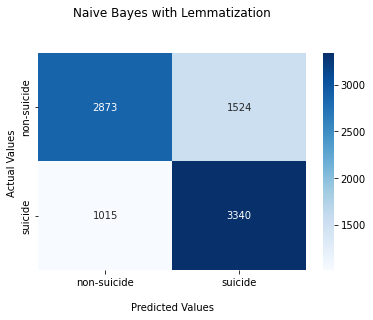

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Naive Bayes with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

gb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % gb_accuracy)

gb_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % gb_precision)

gb_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % gb_recall)

gb_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % gb_f1_score)


[[2683 1714]
 [1079 3276]]


              precision    recall  f1-score   support

 non-suicide       0.71      0.61      0.66      4397
     suicide       0.66      0.75      0.70      4355

    accuracy                           0.68      8752
   macro avg       0.68      0.68      0.68      8752
weighted avg       0.68      0.68      0.68      8752



Accuracy: 0.680873
Precision: 0.656513
Recall: 0.752239
F1 Score: 0.701124


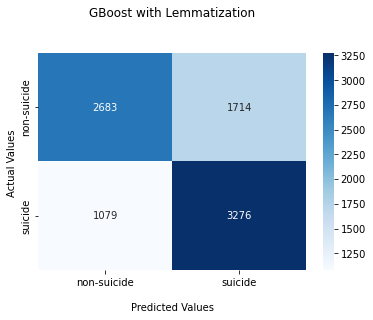

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('GBoost with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Adaptive Boosting

In [ ]:
adb = AdaBoostClassifier(n_estimators=100)
adb.fit(x_train, y_train)
y_pred = adb.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

adb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % adb_accuracy)

adb_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % adb_precision)

adb_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % adb_recall)

adb_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % adb_f1_score)


[[2874 1523]
 [1147 3208]]


              precision    recall  f1-score   support

 non-suicide       0.71      0.65      0.68      4397
     suicide       0.68      0.74      0.71      4355

    accuracy                           0.69      8752
   macro avg       0.70      0.70      0.69      8752
weighted avg       0.70      0.69      0.69      8752



Accuracy: 0.694927
Precision: 0.678081
Recall: 0.736625
F1 Score: 0.706141


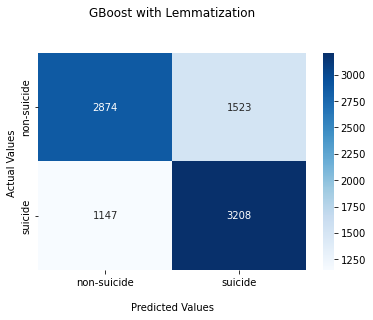

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('GBoost with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## K Nearest Neighbor

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=5,leaf_size=30)
knn2.fit(x_train, y_train)
y_pred = knn2.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

knn2_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % knn2_accuracy)

knn2_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % knn2_precision)

knn2_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % knn2_recall)

knn2_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % knn2_f1_score)


[[1944 2453]
 [1307 3048]]


              precision    recall  f1-score   support

 non-suicide       0.60      0.44      0.51      4397
     suicide       0.55      0.70      0.62      4355

    accuracy                           0.57      8752
   macro avg       0.58      0.57      0.56      8752
weighted avg       0.58      0.57      0.56      8752



Accuracy: 0.570384
Precision: 0.554081
Recall: 0.699885
F1 Score: 0.618506


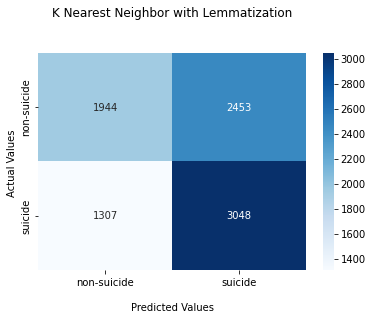

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('K Nearest Neighbor with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100,criterion = 'entropy', random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)


In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % rf_accuracy)

rf_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % rf_precision)

rf_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % rf_recall)

rf_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % rf_f1_score)


[[3139 1258]
 [1420 2935]]


              precision    recall  f1-score   support

 non-suicide       0.69      0.71      0.70      4397
     suicide       0.70      0.67      0.69      4355

    accuracy                           0.69      8752
   macro avg       0.69      0.69      0.69      8752
weighted avg       0.69      0.69      0.69      8752



Accuracy: 0.694013
Precision: 0.699976
Recall: 0.673938
F1 Score: 0.686710


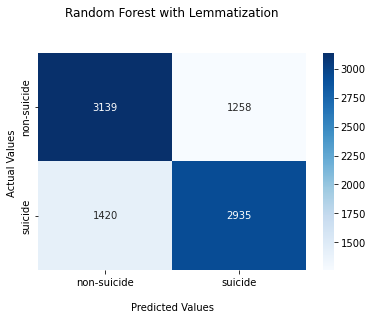

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Random Forest with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Support Vector Machine

In [ ]:
svm = LinearSVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

svm_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % svm_accuracy)

svm_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % svm_precision)

svm_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % svm_recall)

svm_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % svm_f1_score)


[[2765 1632]
 [1358 2997]]


              precision    recall  f1-score   support

 non-suicide       0.67      0.63      0.65      4397
     suicide       0.65      0.69      0.67      4355

    accuracy                           0.66      8752
   macro avg       0.66      0.66      0.66      8752
weighted avg       0.66      0.66      0.66      8752



Accuracy: 0.658364
Precision: 0.647440
Recall: 0.688175
F1 Score: 0.667186


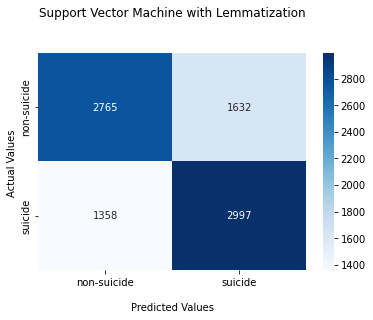

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Support Vector Machine with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Comparision Graphs

       Score        NB        GB       ADB       KNN        RF
0  Accuracy   0.709895  0.680873  0.694927  0.570384  0.694013
1  Precision  0.686678  0.656513  0.678081  0.554081  0.699976
2  Recall     0.766935  0.752239  0.736625  0.699885  0.673938
3  F1 Score   0.724591  0.701124  0.706141  0.618506  0.686710





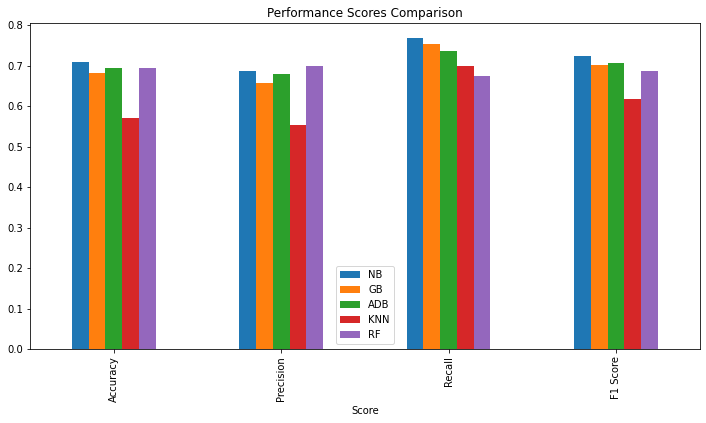

In [ ]:
cmpDf = pd.DataFrame([['Accuracy', nb_accuracy, gb_accuracy,adb_accuracy, knn2_accuracy, rf_accuracy], 
                      ['Precision', nb_precision, gb_precision,adb_precision, knn2_precision, rf_precision], 
                      ['Recall', nb_recall, gb_recall,adb_recall, knn2_recall, rf_recall],
                      ['F1 Score', nb_f1_score, gb_f1_score,adb_f1_score, knn2_f1_score, rf_f1_score]],
                  columns=['Score', 'NB', 'GB', 'ADB', 'KNN', 'RF'])
# view data
print(cmpDf)
print("\n\n")

# plot grouped bar chart
ax = cmpDf.plot(x='Score',
        figsize=(12,6),
        kind='bar',
        stacked=False,
        title='Performance Scores Comparison')



# Model zz2
*  **Preprocessing:** Lemmatization
*  **Feature Extraction:** TF IDF + NGRAM(ngram_range=(1,3), analyzer='char')

*  **ML Algorithms:** Naive Bayes, Gradient Boosting, K Nearest Neighbor, Random Forest

## Data preprocessing & feature extraction

In [ ]:
# title Lemmatization
nlp = spacy.load("en", disable=['parser', 'tagger', 'ner'])
nlp.Defaults.stop_words -= {"no", "not", "n't", "nothing", "without", "nobody"}
stops = stopwords.words("english")

def normalize(text, lowercase, remove_stopwords):
    if lowercase:
        text = text.lower()
    text = re.sub('W*dw*',' ', text)            #remove words and digits like game57
    text = re.sub('https:\/\/.*',' ', text)     #remove url       
    text = re.sub('[^a-zA-Z]', ' ', text)       #remove non alphabetic character
    text = re.sub(' +', ' ', text)              #remove extra space 
    text = nlp(text)
    lemmatized = list()
    for word in text:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)


dataset['text'] = dataset['text'].replace('\n',' ', regex=True)         #removing new lines
dataset['text'] = dataset['text'].apply(normalize, lowercase=True, remove_stopwords=True)


In [ ]:
dataset.sample(10)

,text,class
39937,want wife mom aughter sister aunt tire want people laun ry ishes want rive people aroun hate life way leave go see new psychologist next month current one stare like eer hea light swear like oesn know bathroom cry ki yell og bark much tomorrow want go sit bench rinking tea watch snow,non-suicide
10977,-PRON- f ha severe epression anxiety along thing since year old really sick hashimotos last three year greatly contribute epression always exhauste even walk aroun store anymore without feel faint panic attack every night beg take hospital scare -PRON- overstimulate time feel isconnecte everything aroun -PRON- exhauste mentally physically every morning wake work want break cry feel like nothing live boyfrien always issue -PRON- constantly aroun ever since ki personal therapist listen tell terrible thing wante people n like tell mom evil bitch hope ies tell ba ly wante kill ba guy though one kin est people know sick people ten ency put problem nee help one wish coul quit job wish coul get break feel constant guilt shame family eal -PRON- tire anymore fight long ki long much pain constant consistent year wish know one want help want get isability win help even though try get hol caseworker month nothing know go wanna give text mom every ay tell anymore cry cry cry one get,non-suicide
40612,hate hate negative hate always sa self esteem feel low epression really starte ﻿1 transferre university back fall excite gra uate community college associate egree feel like coul anything wante get math course way feel time coul han le take two math course science class semester get overwhelme uring mi le semester harme ﻿1 time semester put aca emic probation covi happene aca emic probation finally get en change n really eat crie every single ay negative become habit know en woul hurt love one feel like never happy ever something stupi back october feel isguste guilty ashame cut ba nee e get stitch hospital ﻿1 state cut acci ental believe time prior happen try get help fin therapist counselor trie university ﻿1 sai full trie outsi e therapist couselors either full n take insurance feel guilty tol one stitche intentionally evaluate send facility involuntary think go woul help n unfortunately e feel even much ashame goo person hate,suicide
20364,hello let get straight point past two month experience su en strong suici al thought impulse usually night time happen much much often happen every night past ays night har er eal night suici al many time life never like epresse anxious stresse right life back track month ago feel fine good bam get suici al itch scratch rather scratch go goo amp x b right want ie ba ly impulse really get quite worrie safety tomorrow morning everything back normal procee normal ay confuse anyone experience anything like,suicide
35754,ruine life every possible way lose gf year icte rug piece shit trouble police make fin ing job basically impossible roppe uni tol parent literally single person talk lose frien asshole -PRON- go take fuckton yew see tonight hope quickly,suicide
6030,tire struggle hopefully work make positive change everyone live thank,suicide
4028,maybe har est time life away college sometimes suici al thought lou anything tol mom oing good worrie ea extent mean oing good honest probably ie fear force come home feel like honest maybe one ay kill feel even much guilty know feel way one point lie sleep easy one person think coul comfort wish like everyone else sake sometimes wish one care slight coul live estructively ie young guilt free substance use lately plunge eeper fuck shithole rut woul miracle tragic acci ent kill,suicide
10899,like many spend majority life battle epression year try ifferent work cause burnout break last year pushe try yet another combination month work month life thing okay even happy pretty often two week ago lose well frien lose since morning wrong ﻿1 thing woul see wake talke uring morning routine commute home n wrong know wait cook inner impossible without cry always

**TF-IDF model**

In [ ]:
# @title Feature Extraction: TF-IDF Model
tfidf = TfidfVectorizer( ngram_range=(1,3), analyzer='char')
x = tfidf.fit_transform(dataset['text'])
y = dataset['class']
x.shape

(43758, 9531)

In [ ]:
#after setting  max_features parameter to 25000
x.shape

(43758, 9531)

In [ ]:
#without max_features parameter
#x.shape

#### out: (232074, 133830)

### Splitting Dataset

In [ ]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

## Multinomial Naive Bayes

In [ ]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

nb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % nb_accuracy)

nb_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % nb_precision)

nb_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % nb_recall)

nb_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % nb_f1_score)


[[3096 1301]
 [1463 2892]]


              precision    recall  f1-score   support

 non-suicide       0.68      0.70      0.69      4397
     suicide       0.69      0.66      0.68      4355

    accuracy                           0.68      8752
   macro avg       0.68      0.68      0.68      8752
weighted avg       0.68      0.68      0.68      8752



Accuracy: 0.684186
Precision: 0.689721
Recall: 0.664064
F1 Score: 0.676650


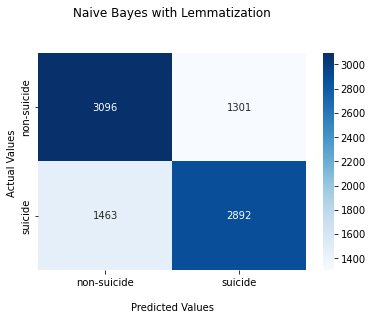

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Naive Bayes with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

gb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % gb_accuracy)

gb_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % gb_precision)

gb_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % gb_recall)

gb_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % gb_f1_score)


[[2801 1596]
 [1133 3222]]


              precision    recall  f1-score   support

 non-suicide       0.71      0.64      0.67      4397
     suicide       0.67      0.74      0.70      4355

    accuracy                           0.69      8752
   macro avg       0.69      0.69      0.69      8752
weighted avg       0.69      0.69      0.69      8752



Accuracy: 0.688186
Precision: 0.668742
Recall: 0.739839
F1 Score: 0.702496


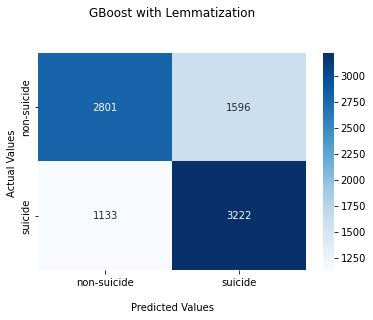

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('GBoost with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Adaptive Boosting

In [ ]:
adb = AdaBoostClassifier(n_estimators=100)
adb.fit(x_train, y_train)
y_pred = adb.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

adb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % adb_accuracy)

adb_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % adb_precision)

adb_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % adb_recall)

adb_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % adb_f1_score)


[[2948 1449]
 [1267 3088]]


              precision    recall  f1-score   support

 non-suicide       0.70      0.67      0.68      4397
     suicide       0.68      0.71      0.69      4355

    accuracy                           0.69      8752
   macro avg       0.69      0.69      0.69      8752
weighted avg       0.69      0.69      0.69      8752



Accuracy: 0.689671
Precision: 0.680626
Recall: 0.709070
F1 Score: 0.694557


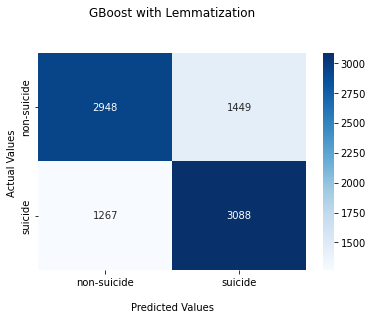

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('GBoost with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## K Nearest Neighbor

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=5,leaf_size=30)
knn2.fit(x_train, y_train)
y_pred = knn2.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

knn2_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % knn2_accuracy)

knn2_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % knn2_precision)

knn2_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % knn2_recall)

knn2_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % knn2_f1_score)


[[2997 1400]
 [2270 2085]]


              precision    recall  f1-score   support

 non-suicide       0.57      0.68      0.62      4397
     suicide       0.60      0.48      0.53      4355

    accuracy                           0.58      8752
   macro avg       0.58      0.58      0.58      8752
weighted avg       0.58      0.58      0.58      8752



Accuracy: 0.580667
Precision: 0.598278
Recall: 0.478760
F1 Score: 0.531888


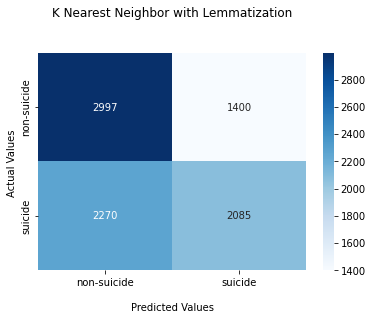

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('K Nearest Neighbor with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100,criterion = 'entropy', random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)


In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % rf_accuracy)

rf_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % rf_precision)

rf_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % rf_recall)

rf_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % rf_f1_score)


[[2861 1536]
 [1371 2984]]


              precision    recall  f1-score   support

 non-suicide       0.68      0.65      0.66      4397
     suicide       0.66      0.69      0.67      4355

    accuracy                           0.67      8752
   macro avg       0.67      0.67      0.67      8752
weighted avg       0.67      0.67      0.67      8752



Accuracy: 0.667847
Precision: 0.660177
Recall: 0.685189
F1 Score: 0.672451


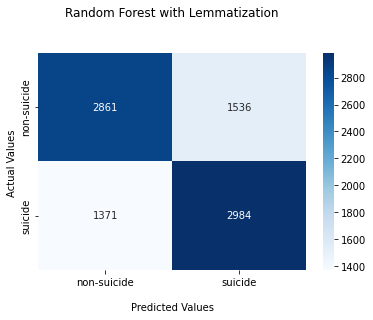

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Random Forest with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Support Vector Machine

In [ ]:
svm = LinearSVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

svm_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % svm_accuracy)

svm_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % svm_precision)

svm_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % svm_recall)

svm_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % svm_f1_score)


[[3123 1274]
 [1313 3042]]


              precision    recall  f1-score   support

 non-suicide       0.70      0.71      0.71      4397
     suicide       0.70      0.70      0.70      4355

    accuracy                           0.70      8752
   macro avg       0.70      0.70      0.70      8752
weighted avg       0.70      0.70      0.70      8752



Accuracy: 0.704410
Precision: 0.704819
Recall: 0.698507
F1 Score: 0.701649


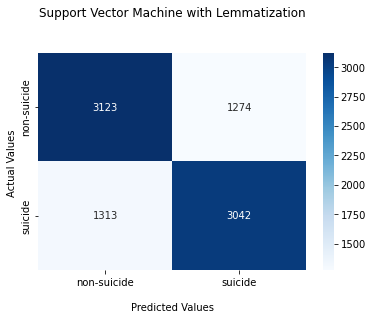

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Support Vector Machine with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Comparision Graphs

       Score        NB        GB       ADB       KNN        RF
0  Accuracy   0.684186  0.688186  0.689671  0.580667  0.667847
1  Precision  0.689721  0.668742  0.680626  0.598278  0.660177
2  Recall     0.664064  0.739839  0.709070  0.478760  0.685189
3  F1 Score   0.676650  0.702496  0.694557  0.531888  0.672451





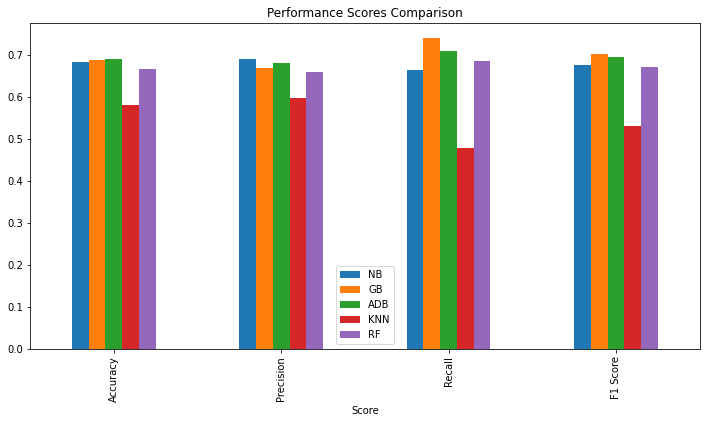

In [ ]:
cmpDf = pd.DataFrame([['Accuracy', nb_accuracy, gb_accuracy,adb_accuracy, knn2_accuracy, rf_accuracy], 
                      ['Precision', nb_precision, gb_precision,adb_precision, knn2_precision, rf_precision], 
                      ['Recall', nb_recall, gb_recall,adb_recall, knn2_recall, rf_recall],
                      ['F1 Score', nb_f1_score, gb_f1_score,adb_f1_score, knn2_f1_score, rf_f1_score]],
                  columns=['Score', 'NB', 'GB', 'ADB', 'KNN', 'RF'])
# view data
print(cmpDf)
print("\n\n")

# plot grouped bar chart
ax = cmpDf.plot(x='Score',
        figsize=(12,6),
        kind='bar',
        stacked=False,
        title='Performance Scores Comparison')



# Model zz3
*  **Preprocessing:** Lemmatization
*  **Feature Extraction:** TF IDF + NGRAM(ngram_range=(3,3), analyzer='char')

*  **ML Algorithms:** Naive Bayes, Gradient Boosting, K Nearest Neighbor, Random Forest

## Data preprocessing & feature extraction

In [ ]:
# title Lemmatization
nlp = spacy.load("en", disable=['parser', 'tagger', 'ner'])
nlp.Defaults.stop_words -= {"no", "not", "n't", "nothing", "without", "nobody"}
stops = stopwords.words("english")

def normalize(text, lowercase, remove_stopwords):
    if lowercase:
        text = text.lower()
    text = re.sub('W*dw*',' ', text)            #remove words and digits like game57
    text = re.sub('https:\/\/.*',' ', text)     #remove url       
    text = re.sub('[^a-zA-Z]', ' ', text)       #remove non alphabetic character
    text = re.sub(' +', ' ', text)              #remove extra space 
    text = nlp(text)
    lemmatized = list()
    for word in text:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)


dataset['text'] = dataset['text'].replace('\n',' ', regex=True)         #removing new lines
dataset['text'] = dataset['text'].apply(normalize, lowercase=True, remove_stopwords=True)


In [ ]:
dataset.sample(10)

,text,class
26837,want go anymore tire want continue family woul react want live,suicide
37950,foun mom old opioi ay right next matt har fuck try get get ri someone take try buil courage alrea want anyone fin ea attempte time give last straw fuck sick bo share min k make sense want hurt anyone go amn much unbearable pain year old never get well rag matt many time mit hospital go iop still way keep go like small sliver hope keep get small small soon hope,suicide
27163,ealt ouble epression major epression ysthymia eca e point completely unrelate service army israeli shit think ukrainians eal something wrong similar situation fuck kill plenty war zone across globe none affecte like recent one bear think much people suffer feel burn insi e never feel empathetic towar something isconnecte please safe please,non-suicide
4883,un erstan person sufferance sure epression status happene almost one year fin something exist affect anyone help anyone get well actually exist fill value earth,non-suicide
28062,zero frien irl partner family abusive ha one guy chatte online leave rea wish ie alrea painful one person promise ignore hate everything everyone,non-suicide
12854,know epression fuck min bo last year epression go ba barely alive corona n help rarely leave apartment rarely move spen hour sit lie know thing goo know epression work lose appetite month ago constantly feel nausea stomach pain even eat fully go away lose lot weight thing make eat proper meal wee consume every even mostly sweet take cook har clean cook even har er sweat much easily hea ache ha heartburn almost month even though never ha know nee properly eat move take care har want ie make esire strong oes anyone similar experience eal,non-suicide
10978,close kill tonight thing stop pet nobo care ie everything much husban oesn care currently bar espite open horrible mental health night shock woul come home fin ea almost want one fin evil think clearly relapse self harm month clean know blee ing sheet type clean tonight awake work hour,suicide
43659,young ult suici al eation since suici e use something think thing get har past year completely apathetic live live oes appeal even thing get well become goo feel satisfaction joy never self harm want unnecessary attention win help always make thing wrong cut wrist invite scorn goo situation want suici e metho quick painless possible access like fentanyl firearm pestici e hang fixture tall buil ings bri ges bo ies water want get vehicular inci ent cause wanna trouble planne caffeine use coffee pow er alcohol couple bottle gin aroun alcohol volume take quick succession realize aroun gram insufficient may en vommitting woul n electrocute since even controlle set sometimes fail ﻿1 time prolong suffer caffeine trick oxaltic aci next something planne last ays eeply contemplate past several month self sabotage oing work aca emics shoul burn bri ges prove point return never think live past holi ays faile semester get expecte turn back live year realize thing never looke forwar anything thing keep get wrong even optimistic always well soon late woul kill never love anyone ever feel love care love never something searche something nee e parent provi e basic nee strict punishment abuse case suici al thought persist even without problem live unappealing life worth trouble ha face face face poste rea expect reaction say wor hope encouragement win help,suicide
3525,rule resource anywhere gui es risk much common meho combo woul think harm uction perspective well ocument correctly instea cause much physical mental injur,suicide
13167,want say sorry english ba english ﻿1 language also tw abuse sexual abuse blackmail pe ofiles f really know start guess coul start begin always ha trouble make frien ﻿1 ay school frien actually get either move away n want frien anymore happene many time count also grow pe ofiles aroun blackmaile sen ing nu es young age multiple time aroun meet guy time nice start isolate much much every ay lose frien almost lose family

**TF-IDF model**

In [ ]:
# @title Feature Extraction: TF-IDF Model
tfidf = TfidfVectorizer( ngram_range=(3,3), analyzer='char')
x = tfidf.fit_transform(dataset['text'])
y = dataset['class']
x.shape

(43758, 8805)

In [ ]:
#after setting  max_features parameter to 25000
x.shape

(43758, 8805)

In [ ]:
#without max_features parameter
#x.shape

#### out: (232074, 133830)

### Splitting Dataset

In [ ]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

## Multinomial Naive Bayes

In [ ]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

nb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % nb_accuracy)

nb_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % nb_precision)

nb_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % nb_recall)

nb_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % nb_f1_score)


[[3009 1388]
 [1333 3022]]


              precision    recall  f1-score   support

 non-suicide       0.69      0.68      0.69      4397
     suicide       0.69      0.69      0.69      4355

    accuracy                           0.69      8752
   macro avg       0.69      0.69      0.69      8752
weighted avg       0.69      0.69      0.69      8752



Accuracy: 0.689100
Precision: 0.685261
Recall: 0.693915
F1 Score: 0.689561


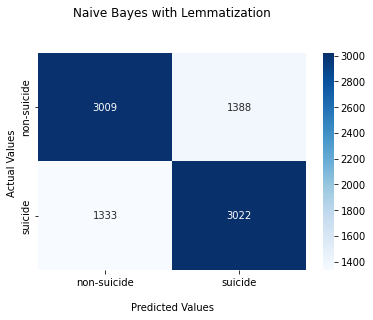

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Naive Bayes with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

gb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % gb_accuracy)

gb_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % gb_precision)

gb_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % gb_recall)

gb_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % gb_f1_score)


[[2749 1648]
 [1111 3244]]


              precision    recall  f1-score   support

 non-suicide       0.71      0.63      0.67      4397
     suicide       0.66      0.74      0.70      4355

    accuracy                           0.68      8752
   macro avg       0.69      0.69      0.68      8752
weighted avg       0.69      0.68      0.68      8752



Accuracy: 0.684758
Precision: 0.663123
Recall: 0.744891
F1 Score: 0.701633


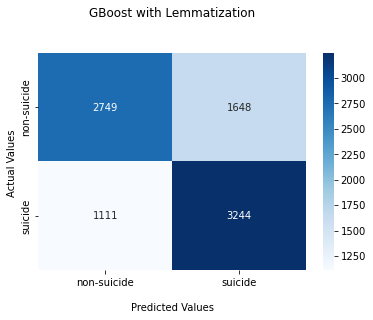

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('GBoost with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Adaptive Boosting

In [ ]:
adb = AdaBoostClassifier(n_estimators=100)
adb.fit(x_train, y_train)
y_pred = adb.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

adb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % adb_accuracy)

adb_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % adb_precision)

adb_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % adb_recall)

adb_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % adb_f1_score)


[[2897 1500]
 [1249 3106]]


              precision    recall  f1-score   support

 non-suicide       0.70      0.66      0.68      4397
     suicide       0.67      0.71      0.69      4355

    accuracy                           0.69      8752
   macro avg       0.69      0.69      0.69      8752
weighted avg       0.69      0.69      0.69      8752



Accuracy: 0.685900
Precision: 0.674338
Recall: 0.713203
F1 Score: 0.693226


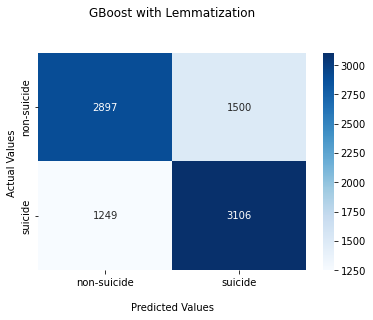

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('GBoost with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## K Nearest Neighbor

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=5,leaf_size=30)
knn2.fit(x_train, y_train)
y_pred = knn2.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

knn2_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % knn2_accuracy)

knn2_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % knn2_precision)

knn2_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % knn2_recall)

knn2_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % knn2_f1_score)


[[1402 2995]
 [1114 3241]]


              precision    recall  f1-score   support

 non-suicide       0.56      0.32      0.41      4397
     suicide       0.52      0.74      0.61      4355

    accuracy                           0.53      8752
   macro avg       0.54      0.53      0.51      8752
weighted avg       0.54      0.53      0.51      8752



Accuracy: 0.530507
Precision: 0.519724
Recall: 0.744202
F1 Score: 0.612029


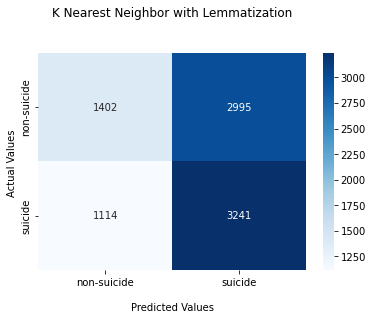

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('K Nearest Neighbor with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100,criterion = 'entropy', random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)


In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % rf_accuracy)

rf_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % rf_precision)

rf_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % rf_recall)

rf_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % rf_f1_score)


[[2985 1412]
 [1380 2975]]


              precision    recall  f1-score   support

 non-suicide       0.68      0.68      0.68      4397
     suicide       0.68      0.68      0.68      4355

    accuracy                           0.68      8752
   macro avg       0.68      0.68      0.68      8752
weighted avg       0.68      0.68      0.68      8752



Accuracy: 0.680987
Precision: 0.678140
Recall: 0.683123
F1 Score: 0.680622


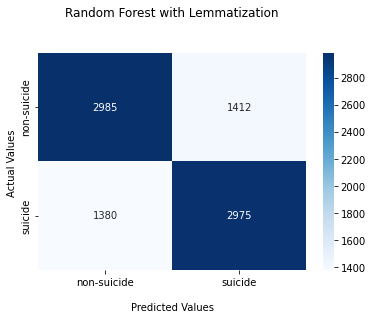

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Random Forest with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Support Vector Machine

In [ ]:
svm = LinearSVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

svm_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % svm_accuracy)

svm_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % svm_precision)

svm_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % svm_recall)

svm_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % svm_f1_score)


[[3048 1349]
 [1272 3083]]


              precision    recall  f1-score   support

 non-suicide       0.71      0.69      0.70      4397
     suicide       0.70      0.71      0.70      4355

    accuracy                           0.70      8752
   macro avg       0.70      0.70      0.70      8752
weighted avg       0.70      0.70      0.70      8752



Accuracy: 0.700526
Precision: 0.695623
Recall: 0.707922
F1 Score: 0.701718


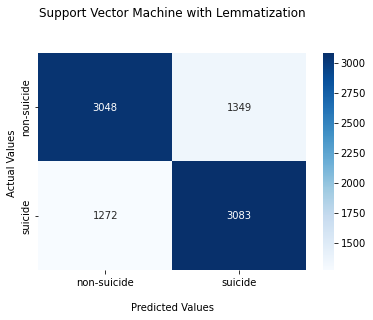

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Support Vector Machine with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Comparision Graphs

       Score        NB        GB       ADB       KNN        RF
0  Accuracy   0.689100  0.684758  0.685900  0.530507  0.680987
1  Precision  0.685261  0.663123  0.674338  0.519724  0.678140
2  Recall     0.693915  0.744891  0.713203  0.744202  0.683123
3  F1 Score   0.689561  0.701633  0.693226  0.612029  0.680622





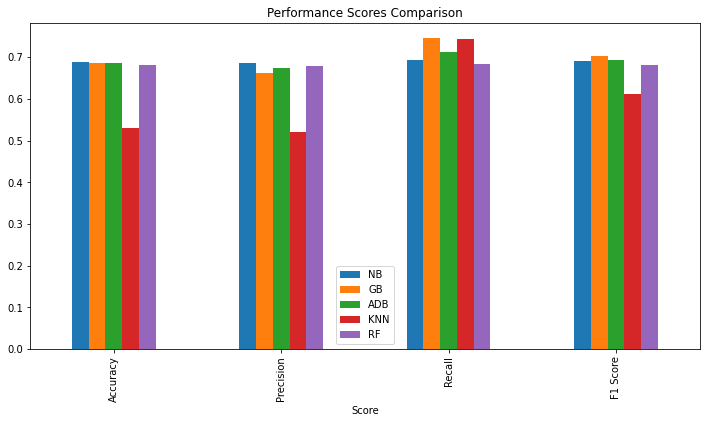

In [ ]:
cmpDf = pd.DataFrame([['Accuracy', nb_accuracy, gb_accuracy,adb_accuracy, knn2_accuracy, rf_accuracy], 
                      ['Precision', nb_precision, gb_precision,adb_precision, knn2_precision, rf_precision], 
                      ['Recall', nb_recall, gb_recall,adb_recall, knn2_recall, rf_recall],
                      ['F1 Score', nb_f1_score, gb_f1_score,adb_f1_score, knn2_f1_score, rf_f1_score]],
                  columns=['Score', 'NB', 'GB', 'ADB', 'KNN', 'RF'])
# view data
print(cmpDf)
print("\n\n")

# plot grouped bar chart
ax = cmpDf.plot(x='Score',
        figsize=(12,6),
        kind='bar',
        stacked=False,
        title='Performance Scores Comparison')



# Model zz4
*  **Preprocessing:** Lemmatization
*  **Feature Extraction:** TF IDF + NGRAM(ngram_range=(1,1), analyzer='word')

*  **ML Algorithms:** Naive Bayes, Gradient Boosting, K Nearest Neighbor, Random Forest

## Data preprocessing & feature extraction

In [ ]:
# title Lemmatization
nlp = spacy.load("en", disable=['parser', 'tagger', 'ner'])
nlp.Defaults.stop_words -= {"no", "not", "n't", "nothing", "without", "nobody"}
stops = stopwords.words("english")

def normalize(text, lowercase, remove_stopwords):
    if lowercase:
        text = text.lower()
    text = re.sub('W*dw*',' ', text)            #remove words and digits like game57
    text = re.sub('https:\/\/.*',' ', text)     #remove url       
    text = re.sub('[^a-zA-Z]', ' ', text)       #remove non alphabetic character
    text = re.sub(' +', ' ', text)              #remove extra space 
    text = nlp(text)
    lemmatized = list()
    for word in text:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)


dataset['text'] = dataset['text'].replace('\n',' ', regex=True)         #removing new lines
dataset['text'] = dataset['text'].apply(normalize, lowercase=True, remove_stopwords=True)


In [ ]:
dataset.sample(10)

,text,class
9474,give prozac week ago eal epression suffer epression anxiety almost life vary level intensity finally manage get help regar ing ication happy finally get help think ruine everything prozac ha much energy negative emotion amplifie sa ness fear anger etc especially anger easily get upset rant say thing really correlate make sense really like usually patient take time choose wor elicate stuff like wor ing prozac like become ifferent person last night sai awful thing gf take back break gf one pillar support always really upset lose reflect lose temper usually woul n sai awful thing even last night feel much epresse take struggle much usual get oing work live think hope leave think reason leave stay exhauste tempte ose rea even usually fatal enough result eath want ie alrea wish never seek help much easy cope epression without everything much much ifficult lose someone important want en nothing important leave painful ly stay,suicide
40604,okay thesis ays hate frien even really ba talk anyone alone ays routine look like loop life stan anymore want live,non-suicide
22729,honestly start get excite life eath whatever sure hell goo shit show useless skill besi es work fast foo way achieve sort ream vision nobo genuinely miss besi es one two people believe un erstan long run ha simply care anymore coul rack k cre car ebt care know walk oor jump bri ge moment everybo always laughe umbest shit never anything great great absolutely nothing appeal mentally ill personality know month six month year three year know time come soon,suicide
2515,sure go within familiar epression spen year therapy ug time illigent work go motion survive however secon bout insi ious go profoun novelty iagnose alone feel much insi ious slow creep wreck see month see feel sign e sure engage routine helpe ress bout work get wrong feel profoun ly alone tail en leave long term mentally abusive relationship swear really istorte sense self much confuse way ironically feel self involve worrie every thing say aroun love ignore input locke hea something n go right may lose frien lose family put anti epressants new effect time aroun still feel terrible terribleness much much banal mun ane scary cling psych appointment ear life walk feel wrong regurgitate articulate feel ba feel like oing putt shitty state min hour get back reality leave nothing feel wrong like hate want make mon ay go another appt scare walk much sa little control miss cry anymore miss able go motion grief stalle miss feel alone soon one hang awash visceral sense lonliness tenable existence keep feel like wish coul take time lose go get way tire stuff scare terrifie sa shit worth feel like,non-suicide
8828,title really get point get marrie back november woman ream job go goo ever yet still feel fuck worthless feel like even eserve epresse yet feel like right unloa self loathe frien family eserve worry fucke hea yet woul give much sit let hell may even able cry coul really talk big thing want anyone think go kill want ie want everyone aroun sa go kill woul give nearly anything never existe wipe min everyone care woul ultimate pleasure though possibility happen want reiterate go kill know super healthy think way suici e go amn selfish justify wish coul hate instea capable oing self icating putt effort everything,non-suicide
30541,normal suici al think arise much rapi ly someone know committe,suicide
41090,know soun silly think know answer wante ask anyways k maybe someone foun something work coul manage happy hour time coul really improve situation able school work coul keep contact frien coul exercise lose weight thing want summon energy motivation sell thing opamine shoot something stuff give nee little fa es away maybe sit escribing rug something unno tire friggin tire scatterbraine time know way improve thing put effort har loneliness sa ness sit refuse bu ge,non-suicide
28089,use terrible person still coul may know coul make much unforgivable mistake aily basis maybe stupi realize get toge

**TF-IDF model**

In [ ]:
# @title Feature Extraction: TF-IDF Model
tfidf = TfidfVectorizer( ngram_range=(1,1), analyzer='word')
x = tfidf.fit_transform(dataset['text'])
y = dataset['class']
x.shape

(43758, 32128)

In [ ]:
#after setting  max_features parameter to 25000
x.shape

(43758, 32128)

In [ ]:
#without max_features parameter
#x.shape

#### out: (232074, 133830)

### Splitting Dataset

In [ ]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

## Multinomial Naive Bayes

In [ ]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

nb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % nb_accuracy)

nb_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % nb_precision)

nb_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % nb_recall)

nb_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % nb_f1_score)


[[3205 1192]
 [1425 2930]]


              precision    recall  f1-score   support

 non-suicide       0.69      0.73      0.71      4397
     suicide       0.71      0.67      0.69      4355

    accuracy                           0.70      8752
   macro avg       0.70      0.70      0.70      8752
weighted avg       0.70      0.70      0.70      8752



Accuracy: 0.700983
Precision: 0.710820
Recall: 0.672790
F1 Score: 0.691282


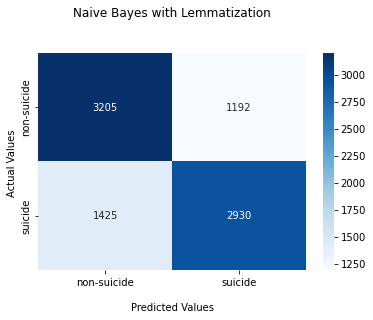

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Naive Bayes with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

gb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % gb_accuracy)

gb_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % gb_precision)

gb_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % gb_recall)

gb_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % gb_f1_score)


[[2733 1664]
 [1110 3245]]


              precision    recall  f1-score   support

 non-suicide       0.71      0.62      0.66      4397
     suicide       0.66      0.75      0.70      4355

    accuracy                           0.68      8752
   macro avg       0.69      0.68      0.68      8752
weighted avg       0.69      0.68      0.68      8752



Accuracy: 0.683044
Precision: 0.661031
Recall: 0.745121
F1 Score: 0.700561


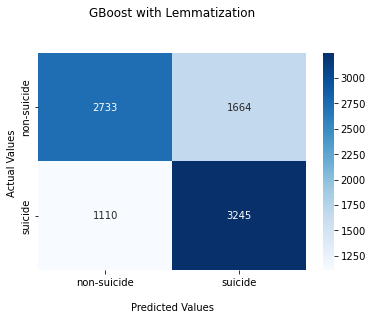

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('GBoost with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Adaptive Boosting

In [ ]:
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_pred = adb.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

adb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % adb_accuracy)

adb_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % adb_precision)

adb_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % adb_recall)

adb_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % adb_f1_score)


[[2840 1557]
 [1190 3165]]


              precision    recall  f1-score   support

 non-suicide       0.70      0.65      0.67      4397
     suicide       0.67      0.73      0.70      4355

    accuracy                           0.69      8752
   macro avg       0.69      0.69      0.69      8752
weighted avg       0.69      0.69      0.69      8752



Accuracy: 0.686129
Precision: 0.670267
Recall: 0.726751
F1 Score: 0.697367


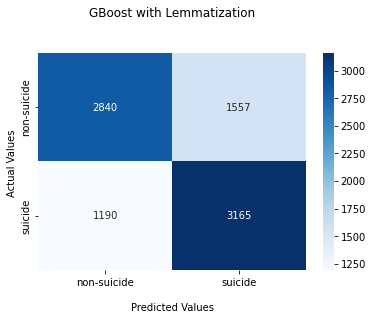

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('GBoost with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## K Nearest Neighbor

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=5,leaf_size=30)
knn2.fit(x_train, y_train)
y_pred = knn2.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

knn2_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % knn2_accuracy)

knn2_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % knn2_precision)

knn2_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % knn2_recall)

knn2_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % knn2_f1_score)


[[ 933 3464]
 [ 952 3403]]


              precision    recall  f1-score   support

 non-suicide       0.49      0.21      0.30      4397
     suicide       0.50      0.78      0.61      4355

    accuracy                           0.50      8752
   macro avg       0.50      0.50      0.45      8752
weighted avg       0.50      0.50      0.45      8752



Accuracy: 0.495430
Precision: 0.495558
Recall: 0.781401
F1 Score: 0.606487


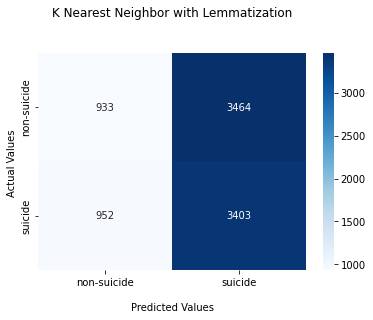

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('K Nearest Neighbor with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Random Forest

In [ ]:
rf = RandomForestClassifier(criterion = 'entropy', random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)


In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % rf_accuracy)

rf_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % rf_precision)

rf_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % rf_recall)

rf_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % rf_f1_score)


[[3072 1325]
 [1320 3035]]


              precision    recall  f1-score   support

 non-suicide       0.70      0.70      0.70      4397
     suicide       0.70      0.70      0.70      4355

    accuracy                           0.70      8752
   macro avg       0.70      0.70      0.70      8752
weighted avg       0.70      0.70      0.70      8752



Accuracy: 0.697783
Precision: 0.696101
Recall: 0.696900
F1 Score: 0.696500


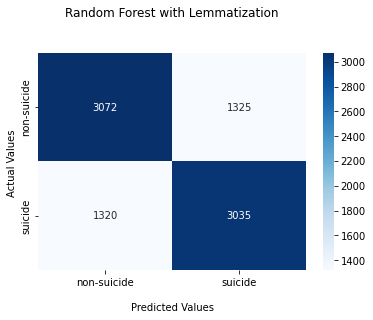

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Random Forest with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Support Vector Machine

In [ ]:
svm = LinearSVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

svm_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % svm_accuracy)

svm_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % svm_precision)

svm_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % svm_recall)

svm_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % svm_f1_score)


[[2994 1403]
 [1313 3042]]


              precision    recall  f1-score   support

 non-suicide       0.70      0.68      0.69      4397
     suicide       0.68      0.70      0.69      4355

    accuracy                           0.69      8752
   macro avg       0.69      0.69      0.69      8752
weighted avg       0.69      0.69      0.69      8752



Accuracy: 0.689671
Precision: 0.684364
Recall: 0.698507
F1 Score: 0.691364


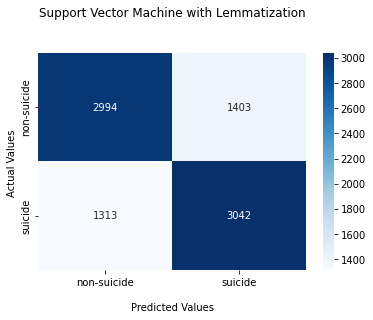

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Support Vector Machine with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Comparision Graphs

       Score        NB        GB       ADB       KNN        RF
0  Accuracy   0.700983  0.683044  0.686129  0.495430  0.697783
1  Precision  0.710820  0.661031  0.670267  0.495558  0.696101
2  Recall     0.672790  0.745121  0.726751  0.781401  0.696900
3  F1 Score   0.691282  0.700561  0.697367  0.606487  0.696500





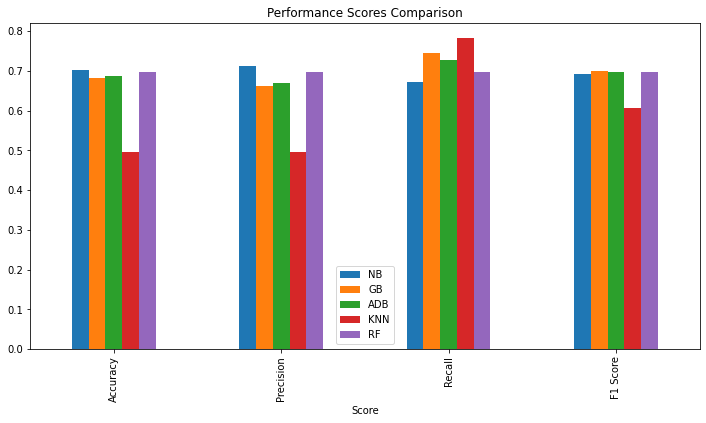

In [ ]:
cmpDf = pd.DataFrame([['Accuracy', nb_accuracy, gb_accuracy,adb_accuracy, knn2_accuracy, rf_accuracy], 
                      ['Precision', nb_precision, gb_precision,adb_precision, knn2_precision, rf_precision], 
                      ['Recall', nb_recall, gb_recall,adb_recall, knn2_recall, rf_recall],
                      ['F1 Score', nb_f1_score, gb_f1_score,adb_f1_score, knn2_f1_score, rf_f1_score]],
                  columns=['Score', 'NB', 'GB', 'ADB', 'KNN', 'RF'])
# view data
print(cmpDf)
print("\n\n")

# plot grouped bar chart
ax = cmpDf.plot(x='Score',
        figsize=(12,6),
        kind='bar',
        stacked=False,
        title='Performance Scores Comparison')



# Model zz5
*  **Preprocessing:** Lemmatization
*  **Feature Extraction:** TF IDF + NGRAM(ngram_range=(1,3), analyzer='word')

*  **ML Algorithms:** Naive Bayes, Gradient Boosting, K Nearest Neighbor, Random Forest

## Data preprocessing & feature extraction

In [ ]:
# title Lemmatization
nlp = spacy.load("en", disable=['parser', 'tagger', 'ner'])
nlp.Defaults.stop_words -= {"no", "not", "n't", "nothing", "without", "nobody"}
stops = stopwords.words("english")

def normalize(text, lowercase, remove_stopwords):
    if lowercase:
        text = text.lower()
    text = re.sub('W*dw*',' ', text)            #remove words and digits like game57
    text = re.sub('https:\/\/.*',' ', text)     #remove url       
    text = re.sub('[^a-zA-Z]', ' ', text)       #remove non alphabetic character
    text = re.sub(' +', ' ', text)              #remove extra space 
    text = nlp(text)
    lemmatized = list()
    for word in text:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)


dataset['text'] = dataset['text'].replace('\n',' ', regex=True)         #removing new lines
dataset['text'] = dataset['text'].apply(normalize, lowercase=True, remove_stopwords=True)


In [ ]:
dataset.sample(10)

text  \
22191  really sure frien tol go kill know han le panic feel overwhelm mom facebook alrea talk win tell think feel know ress know woul even know successfully somebo please give vice scare                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

**TF-IDF model**

In [ ]:
# @title Feature Extraction: TF-IDF Model
tfidf = TfidfVectorizer( ngram_range=(1,3), analyzer='word',max_features=30000)
x = tfidf.fit_transform(dataset['text'])
y = dataset['class']
x.shape

(43758, 30000)

In [ ]:
#after setting  max_features parameter to 25000
x.shape

(43758, 3351781)

In [ ]:
#without max_features parameter
#x.shape

#### out: (232074, 133830)

### Splitting Dataset

In [ ]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

## Multinomial Naive Bayes

In [ ]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

nb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % nb_accuracy)

nb_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % nb_precision)

nb_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % nb_recall)

nb_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % nb_f1_score)


[[3112 1285]
 [1160 3195]]


              precision    recall  f1-score   support

 non-suicide       0.73      0.71      0.72      4397
     suicide       0.71      0.73      0.72      4355

    accuracy                           0.72      8752
   macro avg       0.72      0.72      0.72      8752
weighted avg       0.72      0.72      0.72      8752



Accuracy: 0.720635
Precision: 0.713170
Recall: 0.733639
F1 Score: 0.723260


30 000
Accuracy: 0.720635
Precision: 0.713170
Recall: 0.733639
F1 Score: 0.723260

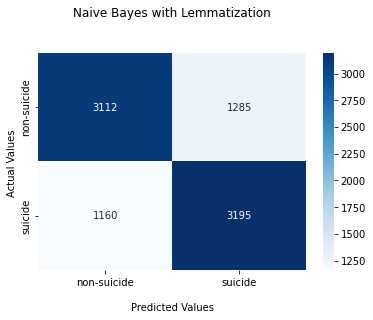

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Naive Bayes with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

gb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % gb_accuracy)

gb_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % gb_precision)

gb_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % gb_recall)

gb_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % gb_f1_score)


[[2733 1664]
 [1101 3254]]


              precision    recall  f1-score   support

 non-suicide       0.71      0.62      0.66      4397
     suicide       0.66      0.75      0.70      4355

    accuracy                           0.68      8752
   macro avg       0.69      0.68      0.68      8752
weighted avg       0.69      0.68      0.68      8752



Accuracy: 0.684072
Precision: 0.661651
Recall: 0.747187
F1 Score: 0.701822


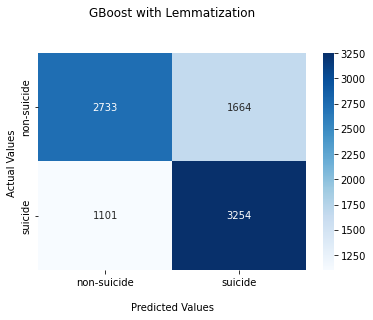

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('GBoost with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Adaptive Boosting

In [ ]:
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_pred = adb.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

adb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % adb_accuracy)

adb_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % adb_precision)

adb_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % adb_recall)

adb_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % adb_f1_score)


[[2849 1548]
 [1206 3149]]


              precision    recall  f1-score   support

 non-suicide       0.70      0.65      0.67      4397
     suicide       0.67      0.72      0.70      4355

    accuracy                           0.69      8752
   macro avg       0.69      0.69      0.68      8752
weighted avg       0.69      0.69      0.68      8752



Accuracy: 0.685329
Precision: 0.670428
Recall: 0.723077
F1 Score: 0.695758


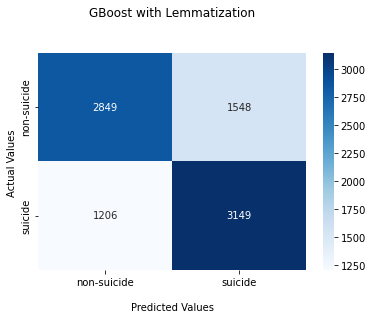

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('GBoost with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## K Nearest Neighbor

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=5,leaf_size=30)
knn2.fit(x_train, y_train)
y_pred = knn2.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

knn2_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % knn2_accuracy)

knn2_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % knn2_precision)

knn2_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % knn2_recall)

knn2_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % knn2_f1_score)


[[ 826 3571]
 [ 898 3457]]


              precision    recall  f1-score   support

 non-suicide       0.48      0.19      0.27      4397
     suicide       0.49      0.79      0.61      4355

    accuracy                           0.49      8752
   macro avg       0.49      0.49      0.44      8752
weighted avg       0.49      0.49      0.44      8752



Accuracy: 0.489374
Precision: 0.491890
Recall: 0.793800
F1 Score: 0.607397


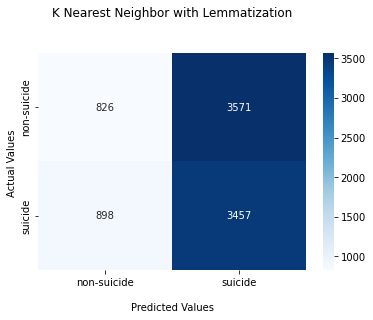

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('K Nearest Neighbor with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Random Forest

In [ ]:
rf = RandomForestClassifier(criterion = 'entropy', random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)


In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % rf_accuracy)

rf_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % rf_precision)

rf_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % rf_recall)

rf_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % rf_f1_score)


[[3075 1322]
 [1251 3104]]


              precision    recall  f1-score   support

 non-suicide       0.71      0.70      0.71      4397
     suicide       0.70      0.71      0.71      4355

    accuracy                           0.71      8752
   macro avg       0.71      0.71      0.71      8752
weighted avg       0.71      0.71      0.71      8752



Accuracy: 0.706010
Precision: 0.701310
Recall: 0.712744
F1 Score: 0.706981


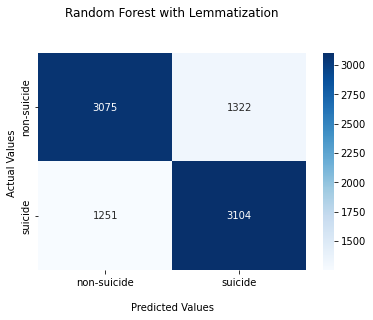

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Random Forest with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Support Vector Machine

In [ ]:
svm = LinearSVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

svm_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % svm_accuracy)

svm_precision = precision_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Precision: %f' % svm_precision)

svm_recall = recall_score(y_test, y_pred, average="binary", pos_label='suicide')
print('Recall: %f' % svm_recall)

svm_f1_score = f1_score(y_test, y_pred, average="binary", pos_label='suicide')
print('F1 Score: %f' % svm_f1_score)


[[2977 1420]
 [1355 3000]]


              precision    recall  f1-score   support

 non-suicide       0.69      0.68      0.68      4397
     suicide       0.68      0.69      0.68      4355

    accuracy                           0.68      8752
   macro avg       0.68      0.68      0.68      8752
weighted avg       0.68      0.68      0.68      8752



Accuracy: 0.682930
Precision: 0.678733
Recall: 0.688863
F1 Score: 0.683761


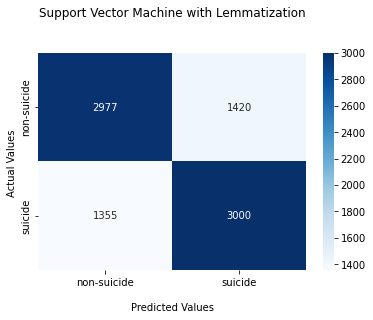

In [ ]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Support Vector Machine with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['non-suicide','suicide'])
ax.yaxis.set_ticklabels(['non-suicide','suicide'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Comparision Graphs

       Score        NB        GB       ADB       KNN        RF
0  Accuracy   0.720635  0.684072  0.685329  0.489374  0.706010
1  Precision  0.713170  0.661651  0.670428  0.491890  0.701310
2  Recall     0.733639  0.747187  0.723077  0.793800  0.712744
3  F1 Score   0.723260  0.701822  0.695758  0.607397  0.706981





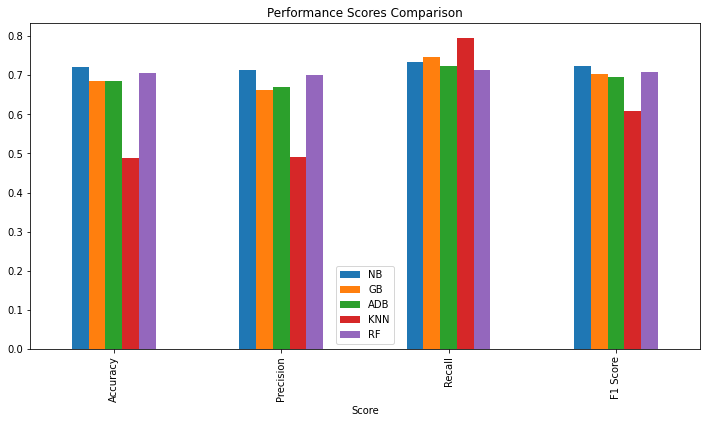

In [ ]:
cmpDf = pd.DataFrame([['Accuracy', nb_accuracy, gb_accuracy,adb_accuracy, knn2_accuracy, rf_accuracy], 
                      ['Precision', nb_precision, gb_precision,adb_precision, knn2_precision, rf_precision], 
                      ['Recall', nb_recall, gb_recall,adb_recall, knn2_recall, rf_recall],
                      ['F1 Score', nb_f1_score, gb_f1_score,adb_f1_score, knn2_f1_score, rf_f1_score]],
                  columns=['Score', 'NB', 'GB', 'ADB', 'KNN', 'RF'])
# view data
print(cmpDf)
print("\n\n")

# plot grouped bar chart
ax = cmpDf.plot(x='Score',
        figsize=(12,6),
        kind='bar',
        stacked=False,
        title='Performance Scores Comparison')

